**Getting the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [2]:
#df=pd.read_csv('dataset_\Final database.csv')
df=pd.read_csv('dataset_/Final database.csv')

In [3]:
df.head(10)

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y 

In [4]:
df.sort_index()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y 

In [5]:
print('Dataset: ', df.shape[0], 'Rows with', df.shape[1], 'Features')

Dataset:  170633 Rows with 151 Features


### Overview of the cleaning that need to be done

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Columns: 151 entries, Country to Cluster
dtypes: float64(58), int64(65), object(28)
memory usage: 196.6+ MB


In [7]:
# Get a first overview of the missing data
df.isna().sum()

Country                    0
Uri                        0
Popularity                 0
Title                      0
Artist                     0
Album/Single               0
Genre                      0
Artist_followers          41
Explicit                   0
Album                      0
Release_date               0
Track_number               0
Tracks_in_album            0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acoustics                  0
instrumentalness           0
liveliness                 0
valence                    0
tempo                      0
duration_ms                0
time_signature             0
Genre_new                  0
Days_since_release      3222
Released_after_2017     3222
Explicit_false             0
Explicit_true              0
album                      0
compilation                0
single                     0
bolero        

In [8]:
# Show missing values in percentage
missing = pd.DataFrame(df.isna().sum() / df.isna().count() * 100).rename(columns={0:'% missing'}).sort_values(by='% missing', ascending=False)
missing.loc[~(missing==0).all(axis=1)]

,% missing
anger_norm2,58.160497
trust_norm2,58.160497
anticipation_norm2,58.160497
disgust_norm2,58.160497
fear_norm2,58.160497
joy_norm2,58.160497
surprise_norm2,58.160497
sadness_norm2,58.160497
negative_norm2,58.127091
positive_norm2,58.127091


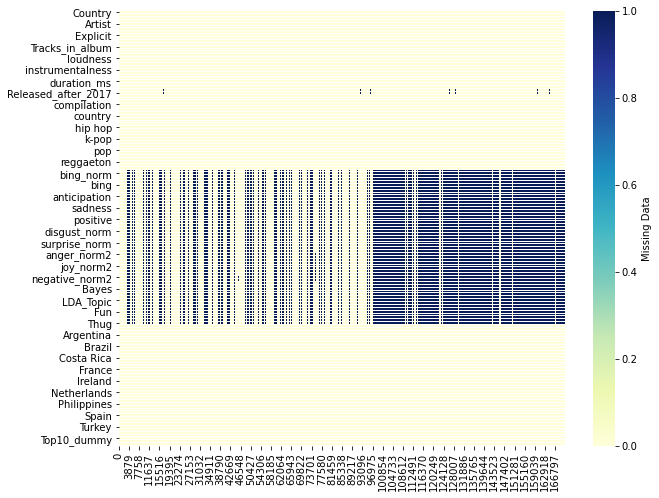

In [9]:
# Missing value in a heatmap
# TODO: Some columns are missing in this plot
# After converting some NaN strings to np.NaN values we need to do this again
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})

In [10]:
# Finding number of duplicated values on the dataset
df.duplicated().sum()

0

### General Cleaning

In [11]:
# Rename genre columns
df.rename(columns={'Genre': 'sub_genre', 'Genre_new': 'genre'}, inplace=True)

In [12]:
# Get overview of genres colums and combine them if they match each other
df_genre = df[['genre', 'sub_genre', 'dance/electronic', 'else', 'funk', 'hip hop',	'house', 'indie',
               'jazz', 'k-pop', 'latin', 'metal', 'opm', 'pop', "r&b/soul", 'rap',	'reggae', 'reggaeton', 
               'rock', 'trap', 'bolero', 'boy band', 'country']]
genre = df[['genre', 'sub_genre']]
df_genre.sample(n=50)

# Check if genre columns can be dropped or not
all_genre = df[['dance/electronic', 'else', 'funk', 'hip hop',	'house', 'indie',
            'jazz', 'k-pop', 'latin', 'metal', 'opm', 'pop', "r&b/soul", 'rap',	'reggae', 'reggaeton',
            'rock', 'trap', 'bolero', 'boy band', 'country']]

genre['check_genre'] = all_genre @ all_genre.columns
genre['equals'] = genre['genre'].equals(genre['check_genre'])
print(f'All rows are the same: {all(genre["equals"])}')
genre.sample(n=10)

All rows are the same: True


,genre,sub_genre,check_genre,equals
150559,k-pop,k-pop,k-pop,True
80605,rap,florida rap,rap,True
130420,pop,danish pop,pop,True
165309,hip hop,turkish hip hop,hip hop,True
50852,rap,emo rap,rap,True
131091,hip hop,danish hip hop,hip hop,True
60932,rap,chicago rap,rap,True
40854,hip hop,detroit hip hop,hip hop,True
66904,pop,pop,pop,True
100715,pop,pop argentino,pop,True


In [13]:
# Drop genre columns
df.drop(columns=['dance/electronic', 'else', 'funk', 'hip hop',	'house', 'indie',
                 'jazz', 'k-pop', 'latin', 'metal', 'opm', 'pop', "r&b/soul", 'rap', 'reggae', 'reggaeton',
                 'rock', 'trap', 'bolero', 'boy band', 'country'], inplace=True)

We have a genre that is called *else*, where unknown gerne types are stored. Also There is a n-a string in the subgenre feature that needs to be cleaned. We first convert all the missing data to NaN values and then overview the data again. 

In [14]:
# Set else values in genre or sub genre to NaN values
df['genre'][df['genre'].str.contains('else')] = np.NaN
df['sub_genre'][df['sub_genre'].str.contains('n-a')] = np.NaN

We can see that in the subgenre column we also have normal gernes like pop or hiphop, that are also in the genres column.

In [15]:
# Cleaning album/single and compilation columns
condition = (df['compilation'] == 1) & ((df['single'] == 1) | (df['album'] == 1))
compare_cols = np.where(condition, True, False)
print(f'Are there any rows where we have a single or album and a compilation? {any(compare_cols)}')
release_type = df[['compilation', 'single', 'album']]

Are there any rows where we have a single or album and a compilation? False


In [16]:
# Drop album, single, compilation and rename Album/Single column
df.drop(columns=['album', 'single', 'compilation'], inplace=True)
df.rename(columns={'Album/Single': 'release_type'}, inplace=True)  # Consisting of album, single, compilation categories
df.sample(n=10)

,Country,Uri,Popularity,Title,Artist,release_type,sub_genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,genre,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
17686,Switzerland,https://open.spotify.com/track/04ZTP5KsCypmtCm...,7658.10,im a mess,Bebe Rexha,album,dance pop,5754092.0,False,Expectations,2018-06-22,2,14,0.63,0.694,11,-6.257,0,0.0253,0.00281,0.0,0.0719,0.216,97.005,195519,4,pop,876.0,1.0,1,0,1.0,1.0,1.0,1.0,2.9,3.0,12.0,2.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,3.0,1.0,3.0,273.0,0.000000,0.007326,0.003663,0.000000,0.010989,0.000000,0.003663,0.010989,0.003663,0.010989,0.000000,0.200000,0.100000,0.000000,0.300000,0.000000,0.100000,0.300000,0.250000,0.750000,0.0,35.0,-1.0,1.0,0.0,0.0,Hope,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,77,0.0,0.0,english speaking and nordic
139164,Finland,https://open.spotify.com/track/5ucTO1n0QtcWyfF...,4.00,tanssien kuljen,Jones,single,finnish reggae,530.0,False,Tanssien kuljen,2017-06-07,1,1,0.617,0.555,10,-7.542,0,0.225,0.0839,0.0,0.701,0.863,95.068,188000,4,reggae,1256.0,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,196,0.0,0.0,english speaking and nordic
103655,Austria,https://open.spotify.com/track/0gCUCcO60ViO5H5...,24.80,never tear us apart,Bishop Briggs,single,electropop,625813,False,"Never Tear Us Apart [From ""Fifty Shades Freed ...",2018-02-02,1,1,0.362,0.655,4,-6.03,0,0.0399,0.00567,3.34e-05,0.123,0.0752,188.962,194853,3,pop,1016.0,1.0,1,0,-1.0,1.0,-1.0,1.0,-0.3,1.0,-1.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,3.0,112.0,0.008929,0.008929,0.000000,0.008929,0.017857,0.008929,0.008929,0.000000,0.008929,0.026786,0.142857,0.142857,0.000000,0.142857,0.285714,0.142857,0.142857,0.000000,0.250000,0.750000,0.0,1.0,-1.0,1.0,0.0,0.0,Love,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,172,0.0,0.0,english speaking and nordic
107553,Germany,https://open.spotify.com/track/2VRNYpYmE2ToZQY...,846.35,christmas time,Backstreet Boys,compilation,boy band,3497769.0,False,Platinum Christmas,2000-11-07,12,16,0.549,0.712,7,-4.686,1,0.0242,0.273,0.0,0.0349,0.445,144.052,256200,4,boy band,7303.0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,0.0,1.0,english speaking and nordic
68794,USA,https://open.spotify.com/track/5BibcbKVdZUuTtt...,941.80,modus,Joji,album,alternative r&b,3586162,False,Necta

There is more missing or broken values in some of the music features. Lets replace them first with NaN values.

In [17]:
# Found again missing values in music features 
df[df.eq('n\x07').any(axis=1)]
df.replace({'n\x07': np.NaN}, inplace=True)

In [18]:
# Change correct datatypes of some columns
df[['danceability', 'energy','loudness', 'speechiness', 
   'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo']] = df[['danceability', 'energy', 'loudness', 'speechiness',
                                                                                               'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo' ]].apply(pd.to_numeric)
# Type conversion for the integer columns doesnt seem to work 
df = df.astype({'mode': int, 'key': int, 'time_signature': int}, errors='ignore')  # Cant convert NaN values to int, so ignore them
df.loc[91956]

Country                                                               UK
Uri                    https://open.spotify.com/track/3uMIfxV8q5tPTWz...
Popularity                                                          17.6
Title                  one love manchester - live from one love manch...
Artist                                                   Various Artists
release_type                                                 compilation
sub_genre                                                            NaN
Artist_followers                                               1029362.0
Explicit                                                           False
Album                  One Love Manchester (Live from One Love Manche...
Release_date                                                  2017-06-04
Track_number                                                           1
Tracks_in_album                                                        1
danceability                                       

In [19]:
# Found again missing values in string columns, so we replace all strings with NaN values
df[df.eq('n-a').any(axis=1)]
df.replace({'n-a': np.NaN}, inplace=True)
df.replace({'#': np.NaN}, inplace=True)

Lets take a look at some of the numeric features. 

In [20]:
df_numeric = df[['Popularity', 'Artist_followers', 'Track_number', 'Tracks_in_album', 'danceability', 'energy',
                 'loudness', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo',
                 'Days_since_release', 'Popu_max','duration_ms']]

In [21]:
df_numeric.describe()

,Popularity,danceability,energy,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,Days_since_release,Popu_max
count,170633.000000,170614.000000,170614.000000,170614.000000,170614.000000,170614.000000,170614.000000,170614.000000,170614.000000,170614.000000,167411.000000,170633.000000
mean,5417.616264,0.667264,0.642241,-6.552988,0.123505,0.242588,0.015041,0.176468,0.492635,120.945493,1337.530228,89.926738
std,13115.854526,0.144848,0.173084,2.650202,0.116658,0.248945,0.090343,0.136723,0.222436,28.795194,2453.554101,57.998729
min,0.800000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000
25%,77.600000,0.578000,0.538000,-7.719000,0.042700,0.045500,0.000000,0.095400,0.323000,98.008000,428.000000,40.000000
50%,515.150000,0.684000,0.662000,-6.128000,0.071200,0.152000,0.000000,0.123000,0.487000,119.930000,834.000000,85.000000
75%,3867.850000,0.772000,0.770000,-4.832000,0.168000,0.369000,0.000040,0.210000,0.663000,140.002000,1240.000000,138.000000
max,233766.900000,0.983000,1.000000,1.634000,0.966000,0.996000,0.987000,0.991000,0.989000,230.270000,44128.000000,200.000000


Result of the first cleaning round:

In [22]:
missing = pd.DataFrame(df.isna().sum() / df.isna().count() * 100).rename(columns={0:'% missing'}).sort_values(by='% missing', ascending=False)
missing.loc[~(missing==0).all(axis=1)]

,% missing
fear_norm2,58.160497
trust_norm2,58.160497
anger_norm2,58.160497
anticipation_norm2,58.160497
disgust_norm2,58.160497
joy_norm2,58.160497
surprise_norm2,58.160497
sadness_norm2,58.160497
positive_norm2,58.127091
negative_norm2,58.127091


We can see that we now have more missing values. Lets talk about, what we can do one by one. 

- It looks like that the emotion and text mining features were only collected for half of the dataset. 
  It makes also sense to drop the features at first and later come back and split the dataset such that 
  we can do emotion analysis with one half of the data. This is possible because we already have a fairly 
  high amount of features and samples
- The numeric music features have a really low amount of missing data, so just replacing them with the 
  mean or mode or their distribution is fine
- Because genre and subgenre have not the same amout of missing data, we can maybe deduce parts of the
  missing genre
- The missing values in the days_since_release can be deduced from the release date column 

For the numeric music features we already know from some basic boxplot analysis, that the these features have many outliers and are sometimes skewed to one side. Therefore we use the mode and not the mean to replace the missing features. For the categorical data we can only use the mode. 


In [23]:
# Music Features
# First handle the missing numeric data

df['danceability'].fillna(df['danceability'].mode()[0], inplace=True)
df['energy'].fillna(df['energy'].mode()[0], inplace=True)
df['loudness'].fillna(df['loudness'].mode()[0], inplace=True)
df['speechiness'].fillna(df['speechiness'].mode()[0], inplace=True)
df['instrumentalness'].fillna(df['instrumentalness'].mode()[0], inplace=True)
df['liveliness'].fillna(df['liveliness'].mode()[0], inplace=True)
df['valence'].fillna(df['valence'].mode()[0], inplace=True)
df['tempo'].fillna(df['tempo'].mode()[0], inplace=True)
df['acoustics'].fillna(df['acoustics'].mode()[0], inplace=True)

# Now handle the missing categorical data
df['mode'].fillna(df['mode'].mode()[0], inplace=True)
df['key'].fillna(df['key'].mode()[0], inplace=True)
df['time_signature'].fillna(df['time_signature'].mode()[0], inplace=True)

In [24]:
# Now lets take a look at the artist followers
df[df['Artist_followers'].isna()].head(10)

,Country,Uri,Popularity,Title,Artist,release_type,sub_genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,genre,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
22508,Global,https://open.spotify.com/track/4spkZ6gRKh827yp...,34.40,sparare alla luna,Salmo - Coez,album,italian hip hop,NaN,True,Playlist,2018-11-09,7,13,0.732,0.681,4,-7.665,0,0.2590,0.38100,0.000177,0.1110,0.151,85.041,211667,4,hip hop,736.0,1.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,0.0,0.0,global
22509,Italy,https://open.spotify.com/track/4spkZ6gRKh827yp...,22915.25,sparare alla luna,Salmo - Coez,album,italian hip hop,NaN,True,Playlist,2018-11-09,7,13,0.732,0.681,4,-7.665,0,0.2590,0.38100,0.000177,0.1110,0.151,85.041,211667,4,hip hop,736.0,1.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1.0,1.0,southern europe and portuguese heritage
94203,UK,https://open.spotify.com/track/4XsG4fUG2oAA5KV...,71.20,throwback,Unknown T - Crazy Cousinz,single,grime,NaN,False,Throwback,2019-02-13,1,1,0.751,0.669,8,-5.878,0,0.1340,0.49400,0.000000,0.1890,0.771,135.903,187053,4,dance/electronic,640.0,1.0,1,0,1.0,1.0,1.0,1.0,4.7,3.0,5.0,3.0,3.0,3.0,0.0,2.0,4.0,2.0,2.0,4.0,5.0,8.0,419.0,0.007160,0.007160,0.00000,0.004773,0.009547,0.004773,0.004773,0.009547,0.011933,0.019093,0.150000,0.150000,0.000000,0.10000,0.200000,0.100000,0.10000,0.200000,0.384615,0.615385,0.0,6.0,-1.0,1.0,0.0,0.0,Hope,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,165,0.0,0.0,english speaking and nordic
94437,UK,https://open.spotify.com/track/6u6yWU80fmPWOol...,68.80,come alive - bonus track,Craig David,single,british soul,NaN,False,Come Alive,2018-11-16,1,1,0.671,0.686,4,-6.390,1,0.0867,0.19600,0.000000,0.1680,0.546,116.189,227227,4,r&b/soul,729.0,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,115,0.0,0.0,english speaking and nordic
96396,UK,https://open.spotify.com/track/1gZ7i4qxXkHZb1r...,11.20,dont cha,The Pussycat Dolls - Busta Rhymes,album,dance pop,NaN,False,PCD,2005-01-01,1,12,0.877,0.637,1,-3.493,0,0.1010,0.00516,0.000003,0.0959,0.569,119.988,272080,4,pop,5787.0,0.0,1,0,1.0,1.0,1.0,1.0,5.0,5.0,12.0,5

In [25]:
# If we try to map the followers from different listings in countries to the ones that are missing we can solve some of the problems
df[df['Artist'] == 'TAEYEON'].head(10)

,Country,Uri,Popularity,Title,Artist,release_type,sub_genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,genre,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
142864,Indonesia,https://open.spotify.com/track/7j2FhVH4n7X7D66...,11.20,fire,TAEYEON,album,k-pop,1578572.0,False,My Voice - The 1st Album,2017-02-28,11,12,0.321,0.820,2,-3.907,1,0.0534,0.2150,0.000000,0.3070,0.343,78.393,187327,4,k-pop,1352.0,1.0,1,0,-1.0,-1.0,-1.0,-1.0,-6.0,-9.0,-8.0,-5.0,2.0,3.0,0.0,3.0,1.0,2.0,0.0,1.0,6.0,1.0,387.0,0.005168,0.007752,0.0,0.007752,0.002584,0.005168,0.0,0.002584,0.015504,0.002584,0.166667,0.25,0.0,0.25,0.083333,0.166667,0.0,0.083333,0.857143,0.142857,1.0,8.0,1.0,0.0,0.0,1.0,Explore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187,0.0,0.0,southern europe and portuguese heritage
142865,Malaysia,https://open.spotify.com/track/7j2FhVH4n7X7D66...,95.20,fire,TAEYEON,album,k-pop,1578572.0,False,My Voice - The 1st Album,2017-02-28,11,12,0.321,0.820,2,-3.907,1,0.0534,0.2150,0.000000,0.3070,0.343,78.393,187327,4,k-pop,1352.0,1.0,1,0,-1.0,-1.0,-1.0,-1.0,-6.0,-9.0,-8.0,-5.0,2.0,3.0,0.0,3.0,1.0,2.0,0.0,1.0,6.0,1.0,387.0,0.005168,0.007752,0.0,0.007752,0.002584,0.005168,0.0,0.002584,0.015504,0.002584,0.166667,0.25,0.0,0.25,0.083333,0.166667,0.0,0.083333,0.857143,0.142857,1.0,8.0,1.0,0.0,0.0,1.0,Explore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,0.0,0.0,english speaking and nordic
142866,Singapore,https://open.spotify.com/track/7j2FhVH4n7X7D66...,12.00,fire,TAEYEON,album,k-pop,1578572.0,False,My Voice - The 1st Album,2017-02-28,11,12,0.321,0.820,2,-3.907,1,0.0534,0.2150,0.000000,0.3070,0.343,78.393,187327,4,k-pop,1352.0,1.0,1,0,-1.0,-1.0,-1.0,-1.0,-6.0,-9.0,-8.0,-5.0,2.0,3.0,0.0,3.0,1.0,2.0,0.0,1.0,6.0,1.0,387.0,0.005168,0.007752,0.0,0.007752,0.002584,0.005168,0.0,0.002584,0.015504,0.002584,0.166667,0.25,0.0,0.25,0.083333,0.166667,0.0,0.083333,0.857143,0.142857,1.0,8.0,1.0,0.0,0.0,1.0,Explore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,186,0.0,0.0,english speaking and nordic
142867,Taiwan,https://open.spotify.com/track/7j2FhVH4n7X7D66...,660.65,fire,TAEYEON,album,k-pop,1578572.0,False,My Voice - The 1st Album,2017-02-28,11,12,0.321,0.820,2,-3.907,1,0.0534,0.2150,0.000000,0.3070,0.343,78.393,187327,4,k-pop,1352.0,1.0,1,0,-1.0,-1.0,-1.0,-1.0,-6.0,-9.0,-8.0,-5.0,2.0,3.0,0.0,3.0,1.0,2.0,0.0,1.0,6.0,1.0,387.0,0.005168,0.007752,0.0,0.007752,0.002584,0.005168,0.0,0.002584,0.015504,0.002584,0.166667,0.25,0.0,0.25,0.083333,0.166667,0.0,0.083333,0.857143,0.142857,1.0,8.0,1.0,0.0,0.0,1.0,Explore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,60,0.0,0.0,english speaking and nordic
142990,Indonesia,https://open.spoti

In [26]:
df['Artist_followers'] = pd.to_numeric(df['Artist_followers'], errors='coerce')

In [27]:
# Get a list of Artists for which the followers are missing
artists = df[df['Artist_followers'].isna()]['Artist'].unique()
# Exclude nan from list of artists
artists = artists[np.logical_not(pd.isna(artists))]

artist_to_followers_mapping = {artist: (df[df['Artist'] == artist]['Artist_followers'].mode().to_list()) for artist in artists}
filled_follower_v = [v for v in artist_to_followers_mapping.values() if v]
print(f'{len(filled_follower_v)}/{len(artist_to_followers_mapping)} total values were found.')

23/35 total values were found.


In [28]:
# Now we map the rest of missing values to the mean follower count
for aritst, follower in artist_to_followers_mapping.items():
    if not follower: # if empty
        artist_to_followers_mapping[aritst] = df['Artist_followers'].mode().values[0]
    if isinstance(follower, list) and follower:
        artist_to_followers_mapping[aritst] = follower[0]

artist_to_followers_mapping

{'Salmo - Coez': 50593376.0,
 'Unknown T - Crazy Cousinz': 50593376.0,
 'Craig David': 619375.0,
 'The Pussycat Dolls - Busta Rhymes': 50593376.0,
 'MC Davo - KHEA': 50593376.0,
 'Andrés Calamaro': 1454573.0,
 'Las Pastillas del Abuelo': 861586.0,
 'Reda Rwena - Nimo - YONII': 47762.0,
 'Samra': 874886.0,
 'Lost Frequencies - Mokita': 50593376.0,
 'Matheus & Kauan': 8144454.0,
 'Los Bunkers': 650450.0,
 'Brudi030 - Sa4': 50593376.0,
 'Medina': 222357.0,
 'Ana Mena - CNCO': 50593376.0,
 'La Oreja de Van Gogh': 2030465.0,
 'Robin': 2110.0,
 'edi': 1702.0,
 'Guè Pequeno - Farid Bang': 50593376.0,
 'Anthony': 12.0,
 'Junior H - Natanael Cano': 50593376.0,
 'Djaga Djaga': 37766.0,
 'KM - Rich Kalashh': 50593376.0,
 'Gabrielle': 42091.0,
 'Alf Prøysen': 11259.0,
 'Arcade Fire': 1835695.0,
 'D.A.M.A': 196349.0,
 'Dree Low': 109007.0,
 'Denz': 28687.0,
 'Festi Baal': 0.0,
 'Sinan Akçıl - Melda': 50593376.0,
 'Joker Xue - Yisa Yu': 50593376.0,
 'Sunset Rollercoaster - OHHYUK': 171421.0,
 'TAEYE

In [29]:
# Assign these values to the correct columns
for artist, follower in artist_to_followers_mapping.items():
    cond = (df['Artist_followers'].isna()) & (df['Artist'] == artist)
    df.loc[cond, 'Artist_followers'] = follower

In [30]:
# All the existing artist followers are now assigned.
df[df['Artist_followers'].isna()]['Artist'].unique()

array([nan], dtype=object)

Do to the high amount of 98767 missing values for a emotion and text mining features we first discard them for the popularity analysis

In [31]:
df.drop(columns=['syuzhet_norm',
                 'bing_norm'         ,
                 'afinn_norm'        ,
                 'nrc_norm'          ,
                 'syuzhet'           ,
                 'bing'              ,
                 'afinn'             ,
                 'nrc'               ,
                 'anger'             ,
                 'anticipation'      ,
                 'disgust'           ,
                 'fear'              ,
                 'joy'               ,
                 'sadness'           ,
                 'surprise'          ,
                 'trust'             ,
                 'negative'          ,
                 'positive'          ,
                 'n_words'           ,
                 'anger_norm'        ,
                 'anticipation_norm' ,
                 'disgust_norm'      ,
                 'fear_norm'         ,
                 'joy_norm'          ,
                 'sadness_norm'      ,
                 'surprise_norm'     ,
                 'trust_norm'        ,
                 'negative_norm'     ,
                 'positive_norm'     ,
                 'anger_norm2'       ,
                 'anticipation_norm2',
                 'disgust_norm2'     ,
                 'fear_norm2'        ,
                 'joy_norm2'         ,
                 'sadness_norm2'     ,
                 'surprise_norm2'    ,
                 'trust_norm2'       ,
                 'negative_norm2'    ,
                 'positive_norm2'    ,
                 'negative_bog_jr'   ,
                 'positive_bog_jr'   ,
                 'Bayes'             ,
                 'Negative_Bayes'    ,
                 'Neutral_Bayes'     ,
                 'Positive_Bayes'    ,
                 'LDA_Topic'         ,
                 'Celebrate'         ,
                 'Desire'            ,
                 'Explore'           ,
                 'Fun'               ,
                 'Hope'              ,
                 'Love'              ,
                 'Nostalgia'         ,
                 'Thug'              ,
                 'Argentina'         ,
                 'Australia'         ,
                 'Austria'           ,
                 'Belgium'           ,
                 'Brazil'            ,
                 'Canada'            ,
                 'Chile'             ,            
                 'Colombia'          ,
                 'Costa Rica'        ,
                 'Denmark'           ,
                 'Ecuador'           ,
                 'Finland'           ,
                 'France'            ,
                 'Germany'           ,
                 'Global'            ,
                 'Indonesia'         ,
                 'Ireland'           ,
                 'Italy'             ,
                 'Malaysia'          ,
                 'Mexico'            ,
                 'Netherlands'       ,
                 'New Zealand'       ,
                 'Norway'            ,
                 'Peru'              ,
                 'Philippines'       ,
                 'Poland'            ,
                 'Portugal'          ,
                 'Singapore'         ,
                 'Spain'             ,
                 'Sweden'            ,
                 'Switzerland'       ,
                 'Taiwan'            ,
                 'Turkey'            ,
                 'UK'                ,
                 'USA'               ,
                 'bing_norm_negative',
                 'bing_norm_neutral' ,
                 'bing_norm_positive'], 
        inplace=True)

In [32]:
df = df.rename(columns=str.lower)
df = df.rename(columns={'liveliness': 'liveness'})
df.columns

Index(['country', 'uri', 'popularity', 'title', 'artist', 'release_type',
       'sub_genre', 'artist_followers', 'explicit', 'album', 'release_date',
       'track_number', 'tracks_in_album', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acoustics', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'genre', 'days_since_release', 'released_after_2017', 'explicit_false',
       'explicit_true', 'popu_max', 'top10_dummy', 'top50_dummy', 'cluster'],
      dtype='object')

In [33]:
print('Dataset: ', df.shape[0], 'Rows with', df.shape[1], 'Features')

Dataset:  170633 Rows with 35 Features


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              170633 non-null  object 
 1   uri                  170628 non-null  object 
 2   popularity           170633 non-null  float64
 3   title                170628 non-null  object 
 4   artist               170628 non-null  object 
 5   release_type         170628 non-null  object 
 6   sub_genre            166681 non-null  object 
 7   artist_followers     170628 non-null  float64
 8   explicit             170628 non-null  object 
 9   album                170628 non-null  object 
 10  release_date         170628 non-null  object 
 11  track_number         170628 non-null  object 
 12  tracks_in_album      170628 non-null  object 
 13  danceability         170633 non-null  float64
 14  energy               170633 non-null  float64
 15  key              

In [35]:
# How many missing data is left
missing = pd.DataFrame(df.isna().sum() / df.isna().count() * 100).rename(columns={0:'% missing'}).sort_values(by='% missing', ascending=False)
missing.loc[~(missing==0).all(axis=1)]

,% missing
genre,5.140272
sub_genre,2.316082
days_since_release,1.888263
released_after_2017,1.888263
duration_ms,0.011135
album,0.002930
uri,0.002930
tracks_in_album,0.002930
release_date,0.002930
track_number,0.002930


Lets take a look at the missing features with 0.002930 %. Its seems like that they are all missing for the same samples. 

In [36]:
df[df['release_date'].isna()]

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster
103976,Austria,NaN,52.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746,0.637,1,-5.35,1,0.102,0.145,0.0,0.106,0.196,100.021,NaN,4,NaN,NaN,NaN,0,0,135,0.0,0.0,english speaking and nordic
103977,Germany,NaN,78.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746,0.637,1,-5.35,1,0.102,0.145,0.0,0.106,0.196,100.021,NaN,4,NaN,NaN,NaN,0,0,103,0.0,0.0,english speaking and nordic
103978,Spain,NaN,26.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746,0.637,1,-5.35,1,0.102,0.145,0.0,0.106,0.196,100.021,NaN,4,NaN,NaN,NaN,0,0,168,0.0,0.0,spanish speaking
103979,Netherlands,NaN,143.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746,0.637,1,-5.35,1,0.102,0.145,0.0,0.106,0.196,100.021,NaN,4,NaN,NaN,NaN,0,0,79,0.0,0.0,english speaking and nordic
103980,Singapore,NaN,89.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746,0.637,1,-5.35,1,0.102,0.145,0.0,0.106,0.196,100.021,NaN,4,NaN,NaN,NaN,0,0,102,0.0,0.0,english speaking and nordic


We can drop these 5 samples, because not even the title and artists is there.

In [37]:
# Drop the na rows
indexes_to_drop = df.index[df['release_date'].isna()].tolist() # There are only 5 rows with n-a release date
df.drop(indexes_to_drop, inplace=True)
df.reset_index(inplace=True)

In [38]:
# How many missing data is left
missing = pd.DataFrame(df.isna().sum() / df.isna().count() * 100).rename(columns={0:'% missing'}).sort_values(by='% missing', ascending=False)
missing.loc[~(missing==0).all(axis=1)]

,% missing
genre,5.137492
sub_genre,2.313219
days_since_release,1.885388
released_after_2017,1.885388
duration_ms,0.008205


At next we focus on the duration

In [39]:
# Convert these values to NaN values
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')
df['duration_ms'].isnull().sum()

14

In [40]:
# Possibility of takeing average numeric value for the 19 missing values
df['duration_ms'].fillna(df['duration_ms'].mean(), inplace=True)
df['duration_ms'].isnull().sum()

0

The missing data from the release data columns can be infered from the real realease data

In [41]:
df[df['days_since_release'].isna()]

,index,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster
4194,4194,Global,https://open.spotify.com/track/4DV9KToOaC0khx2...,8.80,the christmas waltz,Peggy Lee,album,adult standards,270927.0,False,Christmas Carousel,1960,8,12,0.253,0.166,11,-16.882,1,0.0313,0.82900,0.000313,0.140,0.180,106.476,173133.0,3,pop,NaN,NaN,1,0,190,0.0,0.0,global
4195,4195,USA,https://open.spotify.com/track/4DV9KToOaC0khx2...,246.25,the christmas waltz,Peggy Lee,album,adult standards,270927.0,False,Christmas Carousel,1960,8,12,0.253,0.166,11,-16.882,1,0.0313,0.82900,0.000313,0.140,0.180,106.476,173133.0,3,pop,NaN,NaN,1,0,76,0.0,0.0,english speaking and nordic
4196,4196,Belgium,https://open.spotify.com/track/4DV9KToOaC0khx2...,255.10,the christmas waltz,Peggy Lee,album,adult standards,270927.0,False,Christmas Carousel,1960,8,12,0.253,0.166,11,-16.882,1,0.0313,0.82900,0.000313,0.140,0.180,106.476,173133.0,3,pop,NaN,NaN,1,0,79,0.0,0.0,english speaking and nordic
4197,4197,Canada,https://open.spotify.com/track/4DV9KToOaC0khx2...,351.15,the christmas waltz,Peggy Lee,album,adult standards,270927.0,False,Christmas Carousel,1960,8,12,0.253,0.166,11,-16.882,1,0.0313,0.82900,0.000313,0.140,0.180,106.476,173133.0,3,pop,NaN,NaN,1,0,62,0.0,0.0,english speaking and nordic
5710,5710,Global,https://open.spotify.com/track/13hvHEstJ4sNbzd...,16630.35,kiss and make up,Dua Lipa - BLACKPINK,album,dance pop,20575026.0,False,Dua Lipa (Complete Edition),2015,20,25,0.675,0.729,8,-4.383,1,0.1460,0.05570,0.000000,0.189,0.630,99.986,190560.0,4,pop,NaN,NaN,1,0,13,0.0,1.0,global
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170509,170514,Taiwan,https://open.spotify.com/track/3w79AoO52OguIQF...,4417.05,夜空中最亮的星,G.E.M.,single,mandopop,1225408.0,False,夜空中最亮的星,2016,1,1,0.672,0.813,5,-4.535,1,0.0403,0.02300,0.010700,0.125,0.486,109.921,231594.0,4,pop,NaN,NaN,1,0,67,0.0,0.0,english speaking and nordic
170527,170532,Taiwan,https://open.spotify.com/track/2byvjijA9QWZZRI...,535.15,乾杯,Mayday,album,c-pop,803057.0,False,第二人生 NO WHERE 末日版,2011,5,14,0.574,0.820,0,-4.829,1,0.0302,0.03110,0.000000,0.102,0.810,82.009,289200.0,4,pop,NaN,NaN,1,0,53,0.0,0.0,english speaking and nordic
170582,170587,Taiwan,https://open.spotify.com/track/6Q9amSydIpQUtDE...,140.80,最重要的小事,Mayday,album,c-pop,803057.0,False,為愛而生,2006,7,13,0.426,0.719,0,-4.342,1,0.0261,0.00322,0.000233,0.142,0.370,80.043,290813.0,4,pop,NaN,NaN,1,0,118,0.0,0.0,english speaking and nordic
170583,170588,Taiwan,https://open.spotify.com/track/5I5oyzEMqhKtR7s...,537.20,志明與春嬌,Mayday,album,c-pop,803057.0,False,五月天〔創造〕小巨蛋 D.N.A LIVE 創紀錄音,2009,10,26,0.466,0.790,4,-4.868,1,0.0336,0.00209,0.000260,0.209,0.564,116.498,264573.0,4,pop,NaN,NaN,1,0,49,0.0,1.0,english speaking and nordic


In [42]:
date_mapping = df[df['released_after_2017'].isna()]['release_date'].astype(str).str.len() > 4
values_with_years = ~date_mapping
print(f"{df[df['released_after_2017'].isna()].loc[date_mapping].shape[0]}/{df[df['released_after_2017'].isna()]['release_date'].shape[0]} values have more then year information.")
print(df[df['released_after_2017'].isna()]['release_date'])
print(f"mode: {df[df['released_after_2017'].isna()]['release_date'].mode()[0]}")


95/3217 values have more then year information.
4194      1960
4195      1960
4196      1960
4197      1960
5710      2015
          ... 
170509    2016
170527    2011
170582    2006
170583    2009
170615    2011
Name: release_date, Length: 3217, dtype: object
mode: 2013


Now lets have a look at the genre features and clean them 

In [43]:
print(df.loc[(df['genre'].isna()) | (df['sub_genre'].isna()), ['genre', 'sub_genre']])
print('We have 8766 rows in total were  either both genres or one genre is missing')


       genre       sub_genre
299      NaN             NaN
300      NaN             NaN
301      NaN             NaN
302      NaN             NaN
303      NaN             NaN
...      ...             ...
170552   NaN  chinese minyao
170556   NaN             NaN
170567   NaN             NaN
170602   NaN             NaN
170625   NaN             NaN

[8766 rows x 2 columns]
We have 8766 rows in total were  either both genres or one genre is missing


In [44]:
print(df.loc[(df['genre'].isna()) & (df['sub_genre'].isna()), ['genre', 'sub_genre']])
print('We have 4000 rows were both genres are NaN values')

       genre sub_genre
299      NaN       NaN
300      NaN       NaN
301      NaN       NaN
302      NaN       NaN
303      NaN       NaN
...      ...       ...
170525   NaN       NaN
170556   NaN       NaN
170567   NaN       NaN
170602   NaN       NaN
170625   NaN       NaN

[3947 rows x 2 columns]
We have 4000 rows were both genres are NaN values


In [45]:
print(df.loc[(df['genre'].isna()) & (~df['sub_genre'].isna()), ['genre', 'sub_genre']])
print(df.loc[(~df['genre'].isna()) & (df['sub_genre'].isna()), ['genre', 'sub_genre']])


       genre                 sub_genre
1958     NaN                       emo
1959     NaN                       emo
1960     NaN                       emo
1961     NaN                       emo
1962     NaN                       emo
...      ...                       ...
170272   NaN         chinese drama ost
170315   NaN  taiwan singer-songwriter
170416   NaN            chinese manyao
170510   NaN                korean ost
170552   NaN            chinese minyao

[4819 rows x 2 columns]
Empty DataFrame
Columns: [genre, sub_genre]
Index: []


In [46]:
# Set genre to else for known sub_genre
df.loc[(df['genre'].isna()) & (~df['sub_genre'].isna()), 'genre'] = 'else'

In [47]:
# Lets start with deducing genres based on subgenres
df.loc[(df['genre'].isna()) & (~df['sub_genre'].isna()), 'sub_genre'].unique()

array([], dtype=object)

In [48]:
# Possibility of mapping the subgenres
# df['genre'].unique()
# subgenre_to_genre = {'chinese': 'k-pop', 
#                      'taiwan': 'k-pop', 
#                      'korean': 'k-pop', 
#                      'electro': 'dance/electronic', 
#                      'lo-fi beats': 'dance/electronic', 
#                      }

- Replacing the values with the mode would be possible but would also shift our distribution because the missing data are rare genres, hence outliers. Replacing them with pop genres is probablity not the best way and could hurt later on in the modeling part. 
- Doing the mapping by hand would need a lot of time ( Possible Mapping: https://en.wikipedia.org/wiki/List_of_music_genres_and_styles)

So we  decided to first drop the rows with genres and subgenres, but will come back to find a better solution later on. 

In [49]:
idx = df.index[(df['genre'].isna()) & (df['sub_genre'].isna())].tolist()
df.drop(idx, inplace=True)
df.reset_index(inplace=True)

Next we fokus on the release data features that need cleaning.


In [50]:
# Some of the release dates only have years and month
condition = pd.to_datetime(df.loc[(df['released_after_2017'].isna())]['release_date'],format='%Y-%m-%d').dt.year >= 2017
df.loc[(df['released_after_2017'].isna()), 'released_after_2017'] = np.where(condition, True, False)

The columns date sice release are calculateed based on the 21.05.2019, so we will try to average that base on the year and month

In [51]:
# Based on year and month we estimate the the days since release

d = pd.to_datetime({'year': [2019], 'month': [5], 'day': [21]})
diff = d[0] - pd.to_datetime(df.loc[(df['days_since_release'].isna())]['release_date'], format='%Y-%m-%d')
df.loc[df['days_since_release'].isna(), 'days_since_release'] = diff.dt.days


In [52]:
missing = pd.DataFrame(df.isna().sum() / df.isna().count() * 100).rename(columns={0:'% missing'}).sort_values(by='% missing', ascending=False)
print(missing.loc[~(missing==0).all(axis=1)])
print("We now have no missing features anymore! Cleaning part is done.")

Empty DataFrame
Columns: [% missing]
Index: []
We now have no missing features anymore! Cleaning part is done.


### Conversion of features

#### Conversion for duration features

In [53]:
# Convert ms to min 
df['duration_min'] = df['duration_ms']/60000
df.drop(columns=['duration_ms'], inplace=True)

#### Conversion of release data feature

In [54]:
# Convert date to year
df['release_year'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d').dt.year
df['release_month'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d').dt.month
df['release_day'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d').dt.day
df.head(5)

,level_0,index,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
0,0,0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.31065,2018,11,5
1,1,1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
2,2,2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5
3,3,3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
4,4,4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5


In [55]:
df.to_pickle('./dataset_/dataset_cleaned_popularity.pkl')


#### Genre
Now we want to handle missing values of genre, there are some options to do this:
1. Find the song genre from another country (done this, and it's not possible, 'see juju on that beat' song below)
2. Replace them with mode value
3. Replace them with genre 'else' since we really don't know the values

In [56]:
# df[df['genre'].isna()]

In [57]:
# df[df['genre'].isna()].count

In [58]:
# df[df['title'] == 'juju on that beat']

In [59]:
# See the mode of genre
# genre_mode = df['genre'].mode()
# genre_mode

In [61]:
# Replace them with genre_mode
# df['genre'].fillna(genre_mode[0], inplace=True)

In [ ]:
# Check again
# df[df['genre'].isna()]['genre'].count

#### Sub Genre
Now we want to handle missing values of subgenre, there are some options to do this:
1. Replace them with mode value and make sure that it comes from 'pop' subgenre
2. Replace them with genre 'else' since we really don't know the values

In [ ]:
# df[df['sub_genre'].isna()].count

In [ ]:
# # See the mode of genre
# sub_genre_mode = df['sub_genre'].mode()
# sub_genre_mode

In [ ]:
# # Check if it's coming only from pop genre
# df[df['sub_genre'] == 'dance pop']['genre'].unique()

In [62]:
# # Replace them with sub_genre_mode
# df['sub_genre'].fillna(sub_genre_mode[0], inplace=True)

In [63]:
# # Check again
# df[df['sub_genre'].isna()]['sub_genre'].count

#### Released After 2017
We can fill out the missing values by checking `release_year` attribute

In [64]:
# df[df['released_after_2017'].isna()].head()

In [65]:
# # Replace them with conditons by release_year
# cond = df['release_year'] > 2016
# df['released_after_2017'].fillna(cond.map({True: 1, False: 0}), inplace=True)

In [66]:
# df[df['released_after_2017'].isna()].head()

#### Days Since Release
Calculate days from `release_date` until 2020-11-14 (based on calculation on the existing values of days after release)

In [ ]:
# df[df['days_since_release'].isna()].head()

In [ ]:
# Replace with days calculation from release_date
# df['days_since_release'].fillna(
#     pd.to_datetime('2020-11-14', format='%Y-%m-%d') 
#     - pd.to_datetime(df['release_date'], format='%Y-%m-%d')
#     , inplace=True)

In [ ]:
# # Check again
# df[df['days_since_release'].isna()].head()

In [ ]:
# # How many missing data is left
# missing = pd.DataFrame(df.isna().sum() / df.isna().count() * 100).rename(columns={0:'% missing'}).sort_values(by='% missing', ascending=False)
# missing.loc[~(missing==0).all(axis=1)]